# Perform forward kinematics with a trajectory

In this notebook, we are going to generate a short video for a random robot movement you can watch in your browser.

First of all, we need some modules. You can create some simple modules built from geometric primitives yourself - there is a distinct tutorial to that purpose. If you don't want to, we can use the set of simple modules provided with the timor source code:

In [1]:
from pathlib import Path

# provide your own filepaths if you already did the module generation tutorial:
your_modules_json = Path('')
your_assets_directory = Path('')

if your_modules_json == Path(''):
    from timor.utilities.file_locations import get_module_db_files
    modules_file = get_module_db_files('geometric_primitive_modules')

2024-10-29 17:36:04,215 Timor INFO Loading custom configurations from /home/mscsim/.config/timor.config


In [2]:
import numpy as np
import timor
from timor.Module import *
from timor.utilities.visualization import animation, MeshcatVisualizerWithAnimation

#create the DB object
db = ModulesDB.from_json_file(modules_file)

#print out available modules in DB
print(db.by_name)
print(db.by_id)
# print(db.all_joints)
# print(db.all_connectors)


{'Demo EEF': <timor.Module.AtomicModule object at 0x7fad21bbc6a0>, 'I shaped link 0.08-0.08-15': <timor.Module.AtomicModule object at 0x7fad21bbcc70>, 'L shaped link 0.1-0.08-15': <timor.Module.AtomicModule object at 0x7fad21bbdde0>, 'Base': <timor.Module.AtomicModule object at 0x7fad21b39de0>, 'L shaped link 0.1-0.08-30': <timor.Module.AtomicModule object at 0x7fad21bbe5f0>, 'Revolute Joint': <timor.Module.AtomicModule object at 0x7fad21b396f0>, 'I shaped link 0.08-0.08-30': <timor.Module.AtomicModule object at 0x7fad21bbd240>, 'Prismatic Joint': <timor.Module.AtomicModule object at 0x7fad21b3a7a0>, 'L shaped link 0.1-0.08-45': <timor.Module.AtomicModule object at 0x7fad21bbee00>, 'I shaped link 0.08-0.08-45': <timor.Module.AtomicModule object at 0x7fad21bbd810>}
{'eef': <timor.Module.AtomicModule object at 0x7fad21bbc6a0>, 'i_15': <timor.Module.AtomicModule object at 0x7fad21bbcc70>, 'l_15': <timor.Module.AtomicModule object at 0x7fad21bbdde0>, 'base': <timor.Module.AtomicModule obje

In [3]:
#contains IDs we care about. The order is arbitrary, but if we want to make a robot out of this (i.e. kinematic tree) we should put in order.
modules = ('base', 'J2', 'i_45', 'J2', 'J2', 'eef')
A = ModuleAssembly.from_serial_modules(db, modules)
robot = A.to_pin_robot() #convert to pinocchio robot

viz = robot.visualize()
viz.viewer.jupyter_cell(height=400) # generate a jupyter cell to visualize the robot

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7009/static/


In [4]:
#arbitrary new joint state
q2 = np.array([np.pi, -np.pi/2, np.pi/2])


"""Forwards Kinematics (FK) and Forwards Dynamics (FD) methods belong to PinRobot object"""
  # FK https://timor-python.readthedocs.io/en/latest/autoapi/timor/Robot/index.html#timor.Robot.PinRobot.fk
  # FD https://timor-python.readthedocs.io/en/latest/autoapi/timor/Robot/index.html#timor.Robot.PinRobot.fd

# FK calculates the relative rigid body transform from the reference config at a given joint angle position. 
# You can tell it to update the collision hitbox and visual mesh if wanted. I don't think this robot can collide with itself.
print(f"Robot end effector coordinate transform at joint state {q2}", robot.fk(configuration = q2, collision = True, visual = True)) #default kind is tcp - tool center point
print(f"Robot joint coordinate transfom at joint state {q2}", robot.fk(configuration = q2, kind = 'joints', collision = True, visual = True))
print(f"Robot full frames coordinate transfom at joint state {q2}", robot.fk(configuration = q2, kind = 'full', collision = True, visual = True))


#visual just updates the state of the visual geometries, we have to actually visualize to see it
vis = robot.visualize()

#Current robot velocities
print(f"Current robot joint positions (configuration): {robot.configuration}")
print(f"Current robot joint velocities: {robot.velocities}")

# FD calculates joint accelerations (ddq) given joint config (q) and joint velocity (dq) 
print(robot.fd(tau = [1, 0, 0], motor_inertia = False, friction = True))
  

Robot end effector coordinate transform at joint state [ 3.14159265 -1.57079633  1.57079633] [[-0.    1.   -0.    0.5 ]
 [-0.   -0.   -1.   -0.19]
 [-1.   -0.    0.    0.8 ]
 [ 0.    0.    0.    1.  ]]
Robot joint coordinate transfom at joint state [ 3.14159265 -1.57079633  1.57079633] ([[ 1.    0.    0.    0.2 ]
 [-0.    1.    0.   -0.  ]
 [ 0.   -0.    1.    0.05]
 [ 0.    0.    0.    1.  ]], [[-0.   0.   1.   0.2]
 [-1.  -0.  -0.   0. ]
 [ 0.  -1.   0.   0.8]
 [ 0.   0.   0.   1. ]], [[-0.   1.  -0.   0.5]
 [-0.  -0.  -1.   0. ]
 [-1.  -0.   0.   0.8]
 [ 0.   0.   0.   1. ]])
Robot full frames coordinate transfom at joint state [ 3.14159265 -1.57079633  1.57079633] ([[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]], [[ 1.  0.  0.  0.]
 [ 0. -1. -0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0.  1.]], [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]], [[-0.   -0.    1.    0.05]
 [ 0.   -1.    0.    0.  ]
 [ 1.    0.    0.    0.05]
 [ 0.    0.    0.    1.  ]], [[-0.    0

In [5]:
def specific_pose_valid(robot, theta: List[float], task = None) -> bool:
	#perform FK on the theta list
	robot.fk(theta, visual = True, collision = True)
	
	self_collisions = robot.has_self_collision()
	collisions = False if task is None else robot.has_collisions(task, safety_margin=0) #may need to alter safety margin

	return not (collisions or self_collisions)

In [9]:
"""Example of manually defined trajectory with Forwards Kinematics (pt 1)"""

modules = ('base', 'i_30', 'J2', 'J2', 'J2', 'i_30', 'eef')
B = ModuleAssembly.from_serial_modules(db, modules)
long_robot = B.to_pin_robot() #convert to pinocchio robot

q_0 = [np.pi, np.pi, np.pi] #start in this config with no collisions

no_collision_eff = long_robot.fk(q_0, collision = True, visual = True)

#the collisions() method exists, but requires the definition of a task. we look at collision pairs as a quick shortcut.
print("Self collision in this state: ", long_robot.has_self_collision())
long_robot.visualize_self_collisions() #nothing is highlighted b/c no self collisions

print("Specific pose valid: ", specific_pose_valid(long_robot, q_0))

q_1 = [0,0,0]
collision_eff = long_robot.fk(q_1, collision = True, visual = True)

#the collisions() method exists, but requires the definition of a task. we look at collision pairs as a quick shortcut.
print("Self collision in this state: ", long_robot.has_self_collision())
long_robot.visualize_self_collisions() #nothing is highlighted b/c no self collisions

print("Specific pose valid: ", specific_pose_valid(long_robot, q_1))

Self collision in this state:  False
You can open the visualizer by visiting the following URL:
http://127.0.0.1:7013/static/
Specific pose valid:  True
Self collision in this state:  True
collision pair detected: 1 , 11 - collision: Yes
You can open the visualizer by visiting the following URL:
http://127.0.0.1:7014/static/
Specific pose valid:  False


In [13]:
from timor.utilities.transformation import Transformation
from timor.utilities.tolerated_pose import ToleratedPose

no_collision_t = Transformation(no_collision_eff)
no_collision_pose = ToleratedPose(no_collision_t)

In [15]:
def inverse_kinematics(robot, eff_pose):
    transformation = Transformation(eff_pose)
    tolerated_pose = ToleratedPose(transformation)
    
    return robot.ik(tolerated_pose)

In [16]:
#print(long_robot.ik(no_collision_pose))
print(inverse_kinematics(long_robot, no_collision_eff))
print(inverse_kinematics(long_robot, collision_eff))
#print(long_robot.ik(collision_eff))

(array([-3.14159265,  3.14159265,  3.14159265]), True)


2024-10-29 23:28:25,29 Timor INFO IK failed to converge.


(array([-1.04356275,  0.72078817, -0.91744552]), False)


In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

def check_reachable_cubes(robot, space_dimensions, segment_len, error):
    # Extract the x, y, z dimensions of the main cube
    x_dim, y_dim, z_dim = space_dimensions

    # Initialize lists to store the coordinates of reachable and unreachable centers
    reachable_points = []
    unreachable_points = []
    reachable_config = []

    # Generate the ranges for each axis with 0.1m increments
    x_range = np.arange(-x_dim / 2, x_dim / 2 + segment_len, segment_len)
    y_range = np.arange(-y_dim / 2, y_dim / 2 + segment_len, segment_len)
    z_range = np.arange(0, z_dim, segment_len)
    
    progress = 0
    # Iterate through each small cube's center
    total_iterations = len(x_range) * len(y_range) * len(z_range)
    with tqdm(total=total_iterations, desc="Overall Progress", position=0) as pbar:
        for x in x_range:
            for y in y_range:
                for z in z_range:
                    # Define a target 4x4 transformation matrix for the cube center
                    target_matrix = np.array([
                        [1, 0, 0, x],
                        [0, 1, 0, y],
                        [0, 0, 1, z],
                        [0, 0, 0, 1]
                    ])
                    
                    # Check reachability and store the center accordingly
                    pose, success = inverse_kinematics(robot, target_matrix)
                    if success:
                        reachable_points.append([x, y, z])
                        reachable_config.append(pose)
                    else:
                        end_eff = robot.fk(pose, collision = True, visual = True)
                        target_point = np.array([x,y,z])
                        actual_point = np.array([end_eff[0][3], end_eff[1][3], end_eff[2][3]])
                        distance = np.linalg.norm(target_point - actual_point)
                        
                        if distance < error:
                            reachable_points.append([x, y, z])
                            reachable_config.append(pose)
                        else:
                            unreachable_points.append([x, y, z])
                    pbar.update(1)
                    # progress += 1
                    # print("Progress: ", progress/(len(x_range) * len(y_range) * len(z_range)))

    return reachable_points, unreachable_points, reachable_config

def plot_reachability(reachable_points, unreachable_points):
    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Convert lists to numpy arrays for easier plotting
    reachable_points = np.array(reachable_points)
    unreachable_points = np.array(unreachable_points)

    # Plot reachable points in green
    if len(reachable_points) > 0:
        ax.scatter(reachable_points[:, 0], reachable_points[:, 1], reachable_points[:, 2], color='green', label='Reachable', s=5)

    # Plot unreachable points in red
    if len(unreachable_points) > 0:
        ax.scatter(unreachable_points[:, 0], unreachable_points[:, 1], unreachable_points[:, 2], color='red', label='Unreachable', s=5)

    # Set plot labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Reachability Plot')
    ax.legend()

    plt.show()

Overall Progress: 100%|██████████| 100/100 [02:20<00:00,  1.41s/it]

Reachable space %:  0.08


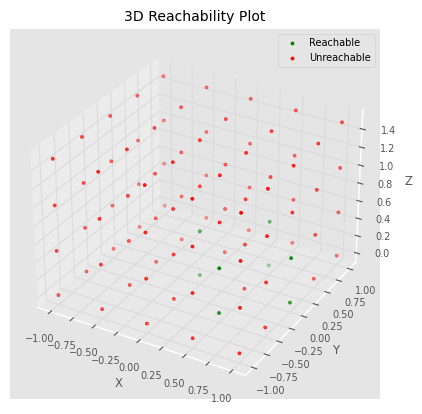

In [41]:
space_dimensions = [2.0, 2.0, 2.0]
reachable_points, unreachable_points, reachable_configs = check_reachable_cubes(long_robot, space_dimensions, 0.5, 0.1)
print("Reachable space %: ", len(reachable_points) / (len(reachable_points) + len(unreachable_points)))
plot_reachability(reachable_points, unreachable_points)

In [45]:
print("Reachable space %: ", len(reachable_points) / (len(reachable_points) + len(unreachable_points)))
print(reachable_points)
for i in range(len(reachable_configs)):
    end_eff = long_robot.fk(reachable_configs[i], collision = True, visual = True)
    print(end_eff)
    target_point = np.array(reachable_points[i])
    actual_point = np.array([end_eff[0][3], end_eff[1][3], end_eff[2][3]])
    print(actual_point)
    distance = np.linalg.norm(target_point - actual_point)
    print("Distance: ", distance)

Reachable space %:  0.08
[[0.0, 0.0, 0.0], [0.0, 0.0, 0.5], [0.5, -0.5, 0.0], [0.5, -0.5, 0.5], [0.5, 0.5, 0.0], [0.5, 0.5, 0.5], [1.0, 0.0, 0.0], [1.0, 0.0, 0.5]]
[[ 0.762 -0.292 -0.578  0.026]
 [-0.606 -0.636 -0.478 -0.003]
 [-0.228  0.715 -0.661  0.026]
 [ 0.     0.     0.     1.   ]]
[ 0.02556117 -0.0027914   0.02596296]
Distance:  0.03654094409676476
[[ 0.566 -0.287 -0.773 -0.044]
 [-0.287  0.811 -0.511 -0.   ]
 [ 0.773  0.511  0.377  0.535]
 [ 0.     0.     0.     1.   ]]
[-4.40779830e-02 -4.29336777e-09  5.34605386e-01]
Distance:  0.056039283583132524
[[ 0.33   0.816  0.476  0.499]
 [ 0.803  0.023 -0.596 -0.479]
 [-0.497  0.578 -0.647  0.033]
 [ 0.     0.     0.     1.   ]]
[ 0.49855265 -0.47919536  0.03303042]
Distance:  0.03906323825100459
[[ 0.811  0.287  0.511  0.5  ]
 [ 0.287  0.566 -0.773 -0.544]
 [-0.511  0.773  0.377  0.535]
 [ 0.     0.     0.     1.   ]]
[ 0.49999985 -0.54407766  0.53460635]
Distance:  0.05603962219609124
[[ 0.165 -0.862  0.48   0.503]
 [-0.789  0.177 